In [94]:
#Import dependencies

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #very efficient array and linear algebra functions
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #Scikit-learn machine learning library for Python
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns

## Read the CSV and Perform Basic Data Cleaning

### Target variable is starting salary.  Goal of multiple linear regression model is to predict a person's starting salary based on school type and location

Potential Features = X = School Name, School Type, Mid-Career Median Salary, Mid-Career 10th Percentile Salary, Mid-Career 25th Percentil Salary, Mid-Career 75th Percentile Salary, Mid-Career 90th Percentile Salary

Value to Predict = Y = Starting Median Salary

In [95]:
#Load the CSV file as a Pandas DataFrame and preview the DataFrame
df = pd.read_csv("salaries-by-college-type.csv")
df.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [96]:
#Remove the fields from the data set that we don't want to include in our model
del df['School Name']
del df['Mid-Career Median Salary']
del df['Mid-Career 10th Percentile Salary']
del df['Mid-Career 25th Percentile Salary']
del df['Mid-Career 75th Percentile Salary']
del df['Mid-Career 90th Percentile Salary']

In [97]:
df.head()

,School Type,Starting Median Salary
0,Engineering,"$72,200.00"
1,Engineering,"$75,500.00"
2,Engineering,"$71,800.00"
3,Engineering,"$62,400.00"
4,Engineering,"$62,200.00"


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   School Type             269 non-null    object
 1   Starting Median Salary  269 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


In [99]:
df['Starting Median Salary']=(df['Starting Median Salary'].replace( '[\$,)]','', regex=True )
                   .replace( '[(]','-',   regex=True ).astype(float))

In [100]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   School Type             269 non-null    object 
 1   Starting Median Salary  269 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [101]:
df.head()

,School Type,Starting Median Salary
0,Engineering,72200.0
1,Engineering,75500.0
2,Engineering,71800.0
3,Engineering,62400.0
4,Engineering,62200.0


<AxesSubplot:title={'center':'Starting Median Salary'}, xlabel='School Type'>

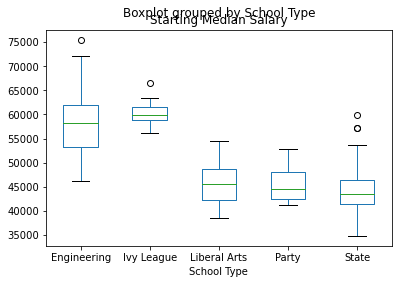

In [102]:
df.boxplot(by='School Type', column=['Starting Median Salary'], grid=False)

Text(0.5, 1.0, 'Starting Median Salaries According to College Type')

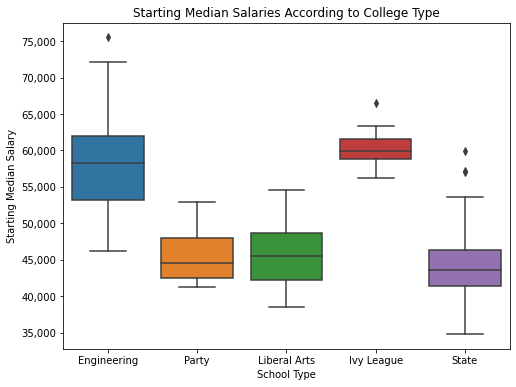

In [103]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df, x="School Type", y="Starting Median Salary", ax=ax)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Starting Median Salaries According to College Type')

Text(0.5, 1.0, 'Starting Median Salaries According to College Type in $')

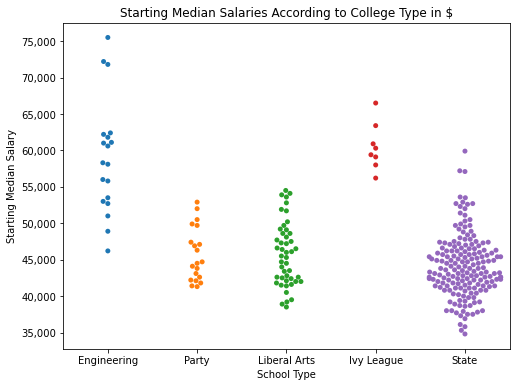

In [108]:
f, ax = plt.subplots(figsize=(8,6))
sns.swarmplot(data=df, x="School Type", y="Starting Median Salary", ax=ax)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Starting Median Salaries According to College Type in $')